In [144]:
!pip install pandasql

In [145]:
import pandas as pd
import pandasql as sqldf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("7003_1.csv")
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
df.head()

C:\Users\BenhamAaron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,36,39,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,asins,brand,...,upc,websiteIDs,weight
0,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
1,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
2,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
3,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
4,AVpfEqFRLJeJML431x7w,NaN,Wild Pair,...,7.63181E+11,NaN,NaN


# CLEANING

In [226]:
df = df[[
    "id",
    "brand",
    "categories",
    "colors",
    "descriptions",
    "features",
    "merchants",
    "name",
    "prices.amountMax",
    "prices.currency",
    "prices.merchant",
    "sizes",
]]
df.head()

,id,brand,categories,...,prices.currency,prices.merchant,sizes
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,NaN,"10,9"
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",...,USD,NaN,"8.5,7,7.5,8"
7,AVpfFCfi1cnluZ0-dcCZ,Sutton Studio,"Women's Suits & Sets,Women's Clothing,All Wome...",...,USD,Sears.com,8
9,AVpfBZCAilAPnD_xTN_K,LaLeela.com,"Women's Clothing,All Women's Clothing,Clothing...",...,USD,La Leela,NaN
11,AVpfHscY1cnluZ0-eVb6,Reebok,"Shoes,Clothing,Women's Shoes,All Women's Shoes...",...,USD,ApparelSave - Walmart.com,"5.5M,6.5M,7M,7.5M,8.5M,6M,11M,9M,10M,8M,9.5M,5..."


In [4]:
df = df.drop_duplicates(subset=["id"])
df.head()

,id,brand,categories,...,prices.currency,prices.merchant,sizes
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,NaN,"10,9"
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",...,USD,NaN,"8.5,7,7.5,8"
7,AVpfFCfi1cnluZ0-dcCZ,Sutton Studio,"Women's Suits & Sets,Women's Clothing,All Wome...",...,USD,Sears.com,8
9,AVpfBZCAilAPnD_xTN_K,LaLeela.com,"Women's Clothing,All Women's Clothing,Clothing...",...,USD,La Leela,NaN
11,AVpfHscY1cnluZ0-eVb6,Reebok,"Shoes,Clothing,Women's Shoes,All Women's Shoes...",...,USD,ApparelSave - Walmart.com,"5.5M,6.5M,7M,7.5M,8.5M,6M,11M,9M,10M,8M,9.5M,5..."


# ANALYSIS

## Merchants

In [227]:
# df["prices.merchant"]

merchant_count = {
    "walmart": 0,
    "ebay": 0,
    "amazon": 0,
    "sears": 0,
    "unbeatablesale": 0
}

for merchant in df["prices.merchant"]:
    try:
        merchant = merchant.lower()
    except:
        if str(merchant) == "nan":
            merchant = str(merchant)
        
    found = False
    
    for mer in merchant_count.keys():
        if mer in merchant:
            merchant_count[mer] += 1
            found = True
    
    if not found:
        merchant_count[merchant] = merchant_count.get(merchant, 0) + 1
    

print(merchant_count)

{'walmart': 3961, 'ebay': 85, 'amazon': 389, 'sears': 854, 'unbeatablesale': 261, 'nan': 3125, 'la leela': 12, 'diligentbuy': 34, 'yutin jia': 155, 'undefined': 120, 'nilima online stores': 54, 'blancho bedding': 45, 'unique bargains': 61, 'fastmedia': 9, 'liquidators': 19, 'ami ventures inc': 31, 'overstock.com': 22, 'prosales': 42, 'wristwatch': 5, 'mirranme': 8, 'exotic express (haruna)': 5, 'closeout zone': 3, 'false': 3, 'neonblond jewelry & accessories': 3, 'bjc products, llc': 42, 'ergode': 20, "lands' end": 8, 'british orchard home fashions': 13, 'www.ralphlauren.com': 58, 'purchase pals': 23, 'fuse optics': 32, 'digituniform': 5, 'whimsical gifts': 1, 'outdoorequipped': 1, 'place stores': 15, 'usaetail': 9, 'arvaco': 2, 'humble brothers llc': 4, 'media mogul': 15, 'sgifashion': 9, 'bidlessnow': 35, 'finejewelryvault': 2, 'all glitters': 1, '2017-01-27t01:37:21z': 1, 'vistabella inc.': 4, 'gleader': 5, 'princetonwatches.com': 3, 'premier sports': 2, 'shablool jewelry design ltd

<BarContainer object of 4 artists>

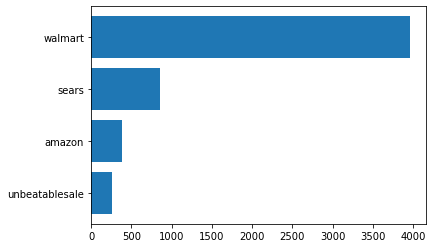

In [228]:
dc = {k: v for k, v in merchant_count.items() if v > 200}
dc.pop("nan")
dc = dict(sorted(dc.items(), key=lambda x:x[1]))

col_labels = []
for i in dc.keys():
    col_labels.append(i)
    
plt.barh(col_labels, dc.values())

## Colours

In [78]:
colour_count = {}
i = 0

for colour in df["colors"]:
    try:
        colour = colour.lower()
        colour = colour.split(",")
        for col in colour:        
            colour_count[col] = colour_count.get(col, 0) + 1
    except:
        if str(colour) == "nan":
            colour = str(colour)
        colour_count[colour] = colour_count.get(colour, 0) + 1
    
print(colour_count)

{'blue': 340, 'multicolor': 78, 'brown': 643, 'pink': 252, 'nan': 3867, 'pink ribbon': 1, 'beige': 419, 'black': 1811, 'red': 318, 'rinse': 4, 'gold': 190, 'flowers': 2, 'white': 455, 'green': 166, 'dolphin': 1, 'blkblk': 3, 'raspberryoyster': 1, 'multi-color': 159, 'greek  roman': 1, 'bay apache distressed': 1, 'olive': 22, 'orange': 82, 'burgundy': 34, 'taupe': 84, 'tan': 151, 'new saddle': 1, 'shiny copper': 1, 'white gold': 6, 'havana': 5, 'beiges': 5, 'luggage': 18, 'gree mul': 1, 'blue mul': 1, 'pink and white': 2, 'silver': 184, 'tpe tumbled pu': 2, 'dark brown': 31, 'red tumbled pu': 2, 'blue grey': 2, 'smokey taupe': 1, 'charcoal heather grey': 1, 'highlight': 1, 'light natural patent': 1, 'navy': 105, 'flat black': 1, 'natural': 86, 'nude pat': 2, 'red paris': 1, 'pewter': 26, 'white patent': 10, 'navy microsuede': 1, 'chestnut': 48, 'other': 22, 'auburn': 2, 'charcoal': 21, 'bittersweet grapefruit': 1, 'black canvas': 3, 'cognac': 45, 'ivory lace mesh': 2, 'ivory': 46, 'waln

<BarContainer object of 8 artists>

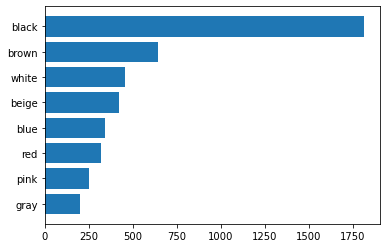

In [108]:
dc = {k: v for k, v in colour_count.items() if v > 200}
dc.pop("nan")
dc = dict(sorted(dc.items(), key=lambda x:x[1]))

col_labels = []
for i in dc.keys():
    col_labels.append(i)
    
plt.barh(col_labels, dc.values())

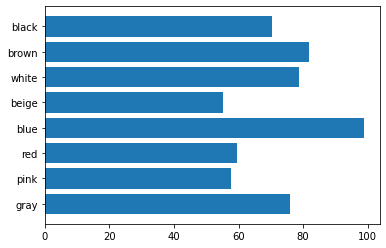

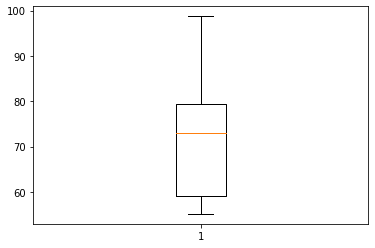

13.775354107894476


In [194]:
avg_price = []

for col in col_labels:
    prices = sorted(df.query(f'colors.str.lower() in "{col}"')["prices.amountMax"])
    floated = []

    for i in prices:
        floated.append(float(i))

    avg_price.append(sum(floated)/len(floated))
    
plt.barh(col_labels, avg_price)
plt.show()

plt.boxplot(avg_price)
plt.show()

print(np.std(avg_price))

## Brands

top brands for women (count):
    1. nike
    2. toms
    3. pleaserusa
    4. nine west
    5. easy spirit
    6. vans
    
top brands for men (count):
    1. nike
    2. puma
    3. reebok
    4. vans
    5. adidas
    6. (no data)
    7. new balance

In [233]:
# SELECT lower(brand), count(DISTINCT(id)) FROM 7003_1 GROUP BY lower(brand);

top_women_brands = ["nike", "toms", "pleaserusa", "nine west", "easy spirit", "vans"]
top_brand_df = df.query(f'brand.str.lower() == {top_women_brands}')

nike_df = df.query(f'brand.str.lower() == "nike"')
toms_df = df.query(f'brand.str.lower() == "toms"')
pleaserusa_df = df.query(f'brand.str.lower() == "pleaserusa"')
ninewest_df = df.query(f'brand.str.lower() == "nine west"')
easyspirit_df = df.query(f'brand.str.lower() == "easy spirit"')
vans_df = df.query(f'brand.str.lower() == "vans"')

all_df = [nike_df, toms_df, pleaserusa_df, ninewest_df, easyspirit_df, vans_df]

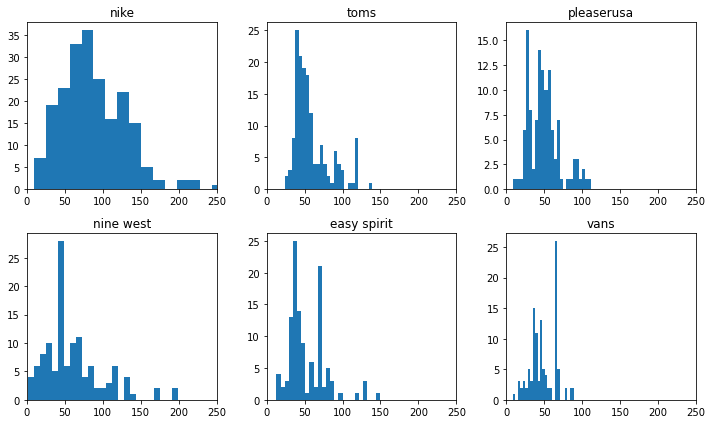

In [249]:
# must consider different currencies
count = 1
plt.figure(figsize=(10,6))

for i in all_df:
    price_list = []

    for item in i["prices.amountMax"]:
        price_list.append(float(item))

    price_list = sorted(price_list)
    
    plt.subplot(2, 3, count)
    plt.xlim(0, 250)
    plt.title(top_women_brands[count-1])
    plt.hist(price_list, bins=25)
    
    count += 1
    
plt.tight_layout()

In [75]:
top_men_brands = ["nike", "puma", "reebok", "adidas", "new balance"]
top_brand_df = df.query(f'brand.str.lower() == {top_men_brands}')
top_brand_df

,id,asins,brand,...,vin,websiteIDs,weight
26,AVpfB4DRLJeJML43007A,NaN,PUMA,...,NaN,NaN,NaN
27,AVpfB4DRLJeJML43007A,NaN,PUMA,...,NaN,NaN,NaN
39,AVpfEsCZ1cnluZ0-dUFR,NaN,adidas,...,NaN,NaN,NaN
47,AVpfJEMqLJeJML433RvY,NaN,PUMA,...,NaN,NaN,NaN
48,AVpfJEMqLJeJML433RvY,NaN,PUMA,...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19295,AVpf3UceLJeJML43FHT4,NaN,Nike,...,NaN,NaN,NaN
19304,AVpfdHJXLJeJML439gNQ,B0119D7OVE,adidas,...,NaN,NaN,NaN
19305,AVpfdHJXLJeJML439gNQ,B0119D7OVE,adidas,...,NaN,NaN,NaN
19306,AVpf0eG_ilAPnD_xi3cq,NaN,Nike,...,NaN,NaN,NaN


## Niche

In [8]:
import json

index = 0

# example of women shoe description
print(df["descriptions"].dropna().unique()[index])

print("")

# convert dirty data into json format for simplier processing
print(json.loads(df["descriptions"].dropna().unique()[index])[0])

print("")

categories = {
    "sneaker": 0, 
    "boot" : 0, 
    "heel" : 0,
    "sandal" : 0,
    "running": 0,
    "train": 0,
    "flat": 0,
    "loaf": 0,
    "walk": 0,
    "clog": 0,
    "other": 0
}

unknown_cat = []

# identify shoe categories using their URL
for i in range(10000):
    try:
        URL = json.loads(df["descriptions"].dropna().unique()[i])[0]["sourceURLs"][0].lower()
        found = False
        for cat in categories.keys():
            if cat in URL:
                categories[cat] += 1
                found = True
        if not found:
            categories["other"] += 1
            unknown_cat.append(URL)
    except:
        pass
    
print(categories)

[{"dateSeen":["2016-11-11T09:49:00Z"],"sourceURLs":["https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0-Women-US-9-Blue-Sneakers/51270891"],"value":"Important Made in USA Origin Disclaimer: For certain items sold by Walmart on Walmart.com, the displayed country of origin information may not be accurate or consistent with manufacturer information. For updated, accurate country of origin data, it is recommended that you rely on product packaging or manufacturer information. Brand & Style - Zoot TT Trainer 2.0 Width - Medium (B, M) True Color - Green Flash/Atomic Blue/Safety Yellow Outsole Material - Man-Made Heel Height - 1 Inches Brand & Style - Zoot TT Trainer 2.0 Width - Medium (B, M) True Color - Green Flash/Atomic Blue/Safety Yellow Outsole Material - Man-Made Heel Height - 1 Inches Find high-quality Zoot shoes with great prices at our store. We carry the very best shoes, boots, and sandals ranging from dress to casual to athletic while offering fast shipping to almost anywhere in the w

In [68]:
unknown_cat[1202]

'https://www.walmart.com/ip/nike-womens-wmns-roshe-one-winter-brigade-blue-sail-685286-441/162269548'

<BarContainer object of 11 artists>

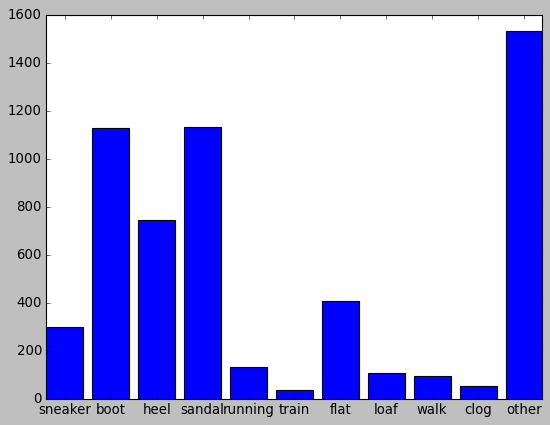

In [9]:
plt.bar(categories.keys(), categories.values())

## Specific Analysis (Nike)

In [46]:
nike_df = df.query('brand.str.lower() == "nike"')
nike_df["prices.amountMax"]

94          88
134        9.5
456        150
477         75
838         70
         ...  
18064    79.98
18080    23.99
18472       75
18793    62.05
18830    51.52
Name: prices.amountMax, Length: 209, dtype: object

In [47]:
npl = []

for item in nike_df["prices.amountMax"]:
    npl.append(float(item))

npl = sorted(npl)

(array([ 4.,  6., 11., 12., 17., 19., 28., 21., 17., 11., 13., 11., 14.,
         5.,  8.,  4.,  0.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([  9.5    ,  19.26225,  29.0245 ,  38.78675,  48.549  ,  58.31125,
         68.0735 ,  77.83575,  87.598  ,  97.36025, 107.1225 , 116.88475,
        126.647  , 136.40925, 146.1715 , 155.93375, 165.696  , 175.45825,
        185.2205 , 194.98275, 204.745  , 214.50725, 224.2695 , 234.03175,
        243.794  , 253.55625, 263.3185 , 273.08075, 282.843  , 292.60525,
        302.3675 , 312.12975, 321.892  , 331.65425, 341.4165 , 351.17875,
        360.941  , 370.70325, 380.4655 , 390.22775, 399.99   ]),
 <BarContainer object of 40 artists>)

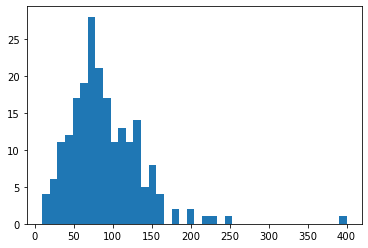

In [53]:
plt.hist(npl, bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce0284cc10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce0285c310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce0284c8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce0285c9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce0285cd30>],
 'means': []}

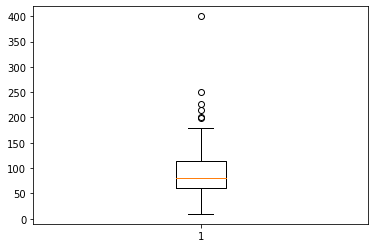

In [49]:
plt.boxplot(npl)